In [330]:
                           '''Régression linière polynomial'''

'Régression linière polynomial'

In [331]:
# étape 1:Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import operator

In [332]:
#étape 2: Charger des données
data=pd.read_csv("C:/dataset/china_gdp.csv")

In [333]:
data

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [334]:
#étape 3:preparation des donnees

In [335]:
#3.a)Traitement les valeurs manquantes
data.isnull().sum()
 

Year     0
Value    0
dtype: int64

In [336]:
#3.b)Le traitement des valeurs dupliquées
data.duplicated().sum()


0

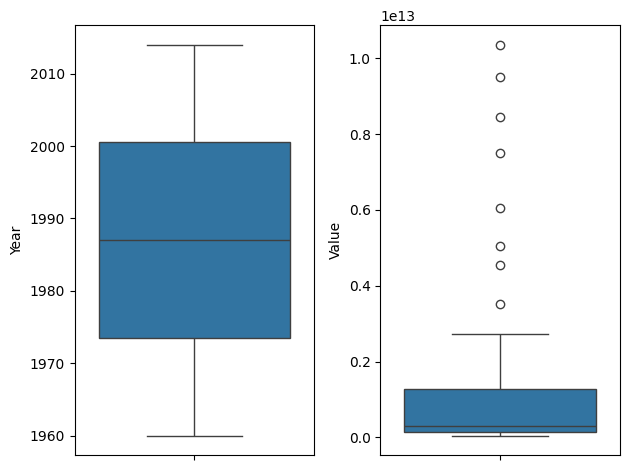

In [337]:
#3.c)Traitement des valeurs aberrantes (Outliers)
f, axes=plt.subplots(1,2)
sns.boxplot(y='Year', data=data, ax=axes[0])
sns.boxplot(y='Value', data=data, ax=axes[1])
plt.tight_layout()
#remarque:il ya des  valeurs aberrantes (Outliers) sauf pour colonne value

In [338]:
Q1 = data['Value'].quantile(0.25)
Q3 = data['Value'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes pour les outliers
lower_bound = Q1 -3 * IQR
upper_bound = Q3 + 3* IQR

# Filtrage des outliers
data= data[(data['Value'] >= lower_bound) & (data['Value'] <= upper_bound)]
data

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [340]:
#étape 4 (Data Visualisation)

In [341]:
#afficher les dernières lignes de data set
data.tail()

,Year,Value
44,2004,1.941746e+12
45,2005,2.268599e+12
46,2006,2.729784e+12
47,2007,3.523094e+12
48,2008,4.558431e+12


In [342]:
#afficher les premières lignes
data.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [343]:
#afficher les Informations sur les types de données et les valeurs manquantes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    49 non-null     int64  
 1   Value   49 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [344]:
#Statistiques descriptives :
data.describe()

,Year,Value
count,49.00000,4.900000e+01
mean,1984.00000,6.558925e+11
std,14.28869,9.455853e+11
min,1960.00000,4.668518e+10
25%,1972.00000,1.121598e+11
50%,1984.00000,2.580821e+11
75%,1996.00000,8.608441e+11
max,2008.00000,4.558431e+12


In [345]:
#Afficher la nuage des points matplotlib

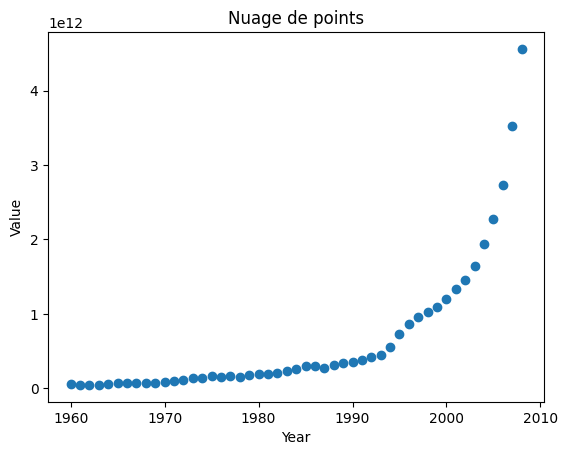

In [346]:
plt.scatter(data['Year'], data['Value'])
plt.title('Nuage de points')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

In [347]:
#Afficher la nuage des points Pandas

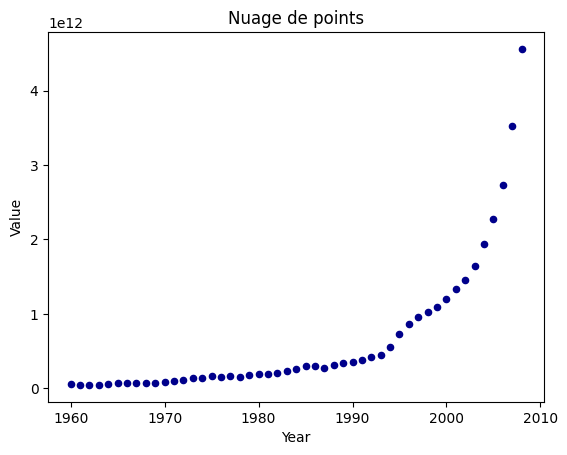

In [348]:
ax = data.plot.scatter(x='Year', y='Value', c='DarkBlue', title='Nuage de points')
ax.set_xlabel('Year')
ax.set_ylabel('Value')
plt.show()


In [349]:
#étape 5 :Division data en 2 data sets :traitement *08% et test 20%

In [350]:
X = data[['Year']].values
Y = data['Value'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39, 1)
(10, 1)
(39,)
(10,)


In [351]:
#étape 6:entraîner le modèle

In [352]:
# la régression linière
regressor_linière = LinearRegression()
regressor_linière.fit(x_train, y_train)

LinearRegression()

In [353]:
#la régression linière polynomiale
degree = 5
poly_features = PolynomialFeatures(degree=degree)
x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_poly_train, y_train)

LinearRegression()

In [354]:
#étape 7:Prédiction sur les données de test

In [355]:
# la régression linière
y_test_pred_lin = regressor_linière.predict(x_test)
y_test_pred_lin

array([ 1.00252962e+12, -3.86796410e+11,  8.35810495e+11,  1.05810266e+12,
        1.16924874e+12,  1.44711395e+12,  1.28039482e+12,  1.61383307e+12,
       -2.20077286e+11, -5.33581628e+10])

In [356]:
#la régression linière polynomiale
y_train_pred_poly = poly_model.predict(x_poly_train)
y_test_pred_poly = poly_model.predict(x_poly_test)
y_test_pred_poly 


array([4.37091803e+11, 1.35396593e+11, 3.63401570e+11, 4.59810171e+11,
       5.07605506e+11, 7.32534316e+11, 5.69324125e+11, 1.07434981e+12,
       1.22572011e+11, 8.48038686e+10])

In [357]:
#Visualiser le résultat de la régression sous forme d’un graphe des deux modèles.

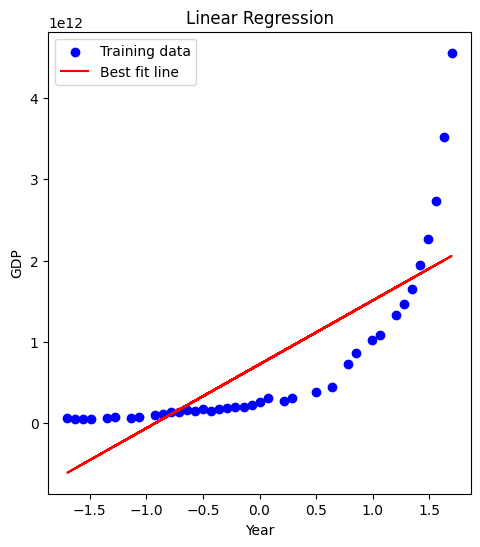

In [358]:
 #la régression linière
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.plot(x_train,  regressor_linière.predict(x_train), color='red', label='Best fit line')
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

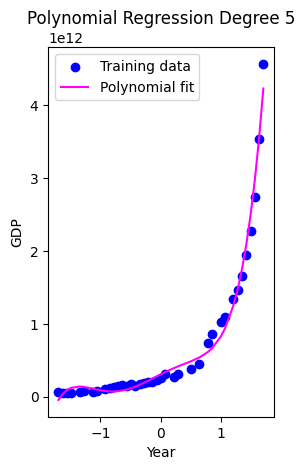

In [359]:
# Régression polynomiale
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, color='blue', label='Training data')
# Pour tracer la courbe, triez les valeurs x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train, y_train_pred_poly), key=sort_axis)
x_train_poly, y_train_poly_pred = zip(*sorted_zip)
plt.plot(x_train_poly, y_train_poly_pred, color='magenta', label='Polynomial fit')
plt.title('Polynomial Regression Degree ' + str(degree))
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()


In [360]:
#étape 8:Évaluation du Modèle

In [361]:
 '''la régression linière'''
print('La performance du modèle sur la base dapprentissage')
mse = mean_squared_error(y_test, y_test_pred_lin)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred_lin)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


La performance du modèle sur la base dapprentissage
Mean Squared Error (MSE): 2.9890893352317472e+23
Root Mean Squared Error (RMSE): 546725647398.37726
Mean Absolute Error (MAE): 513553890488.1462


In [362]:
'''la régression linière polynomiale'''

print('La performance du modèle sur la base dapprentissage')
mse = mean_squared_error(y_test, y_test_pred_poly)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred_poly)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")



La performance du modèle sur la base dapprentissage
Mean Squared Error (MSE): 1.0599858156118995e+22
Root Mean Squared Error (RMSE): 102955612552.7841
Mean Absolute Error (MAE): 83638911270.11707
